In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
filepath = 'E:\\IPBA\BYOP\CPG_Master_data_Set.xlsx'
xlSheet = 'Sheet1'
df_train = pd.read_excel(io=filepath, sheet_name = xlSheet)
df_train.head(10)
print(df_train)

        Invoice  Product_Code  Quantity  InvoiceDate   InvoiceDate_timeStamp  \
0         89058       7259395         3   2019-04-20 2019-04-20 06:02:02.338   
1         89058         10557         5   2019-04-20 2019-04-20 06:02:02.338   
2         89058       2733507         3   2019-04-20 2019-04-20 06:02:02.338   
3         89058       5200349         5   2019-04-20 2019-04-20 06:02:02.338   
4         89058        715497         3   2019-04-20 2019-04-20 06:02:02.338   
...         ...           ...       ...          ...                     ...   
802995    63494         46327         3  2022-12-04  2022-12-04 11:13:23.419   
802996    63494        669238         3  2022-12-04  2022-12-04 11:13:23.419   
802997    63494        325029         4  2022-12-04  2022-12-04 11:13:23.419   
802998    63494         13579         5  2022-12-04  2022-12-04 11:13:23.419   
802999    63494        669238         5  2022-12-04  2022-12-04 11:13:23.419   

        Price  Customer_ID Country  Pac

In [3]:

df_train.head
# 803000 rows 
# 12 columns

<bound method NDFrame.head of         Invoice  Product_Code  Quantity  InvoiceDate   InvoiceDate_timeStamp  \
0         89058       7259395         3   2019-04-20 2019-04-20 06:02:02.338   
1         89058         10557         5   2019-04-20 2019-04-20 06:02:02.338   
2         89058       2733507         3   2019-04-20 2019-04-20 06:02:02.338   
3         89058       5200349         5   2019-04-20 2019-04-20 06:02:02.338   
4         89058        715497         3   2019-04-20 2019-04-20 06:02:02.338   
...         ...           ...       ...          ...                     ...   
802995    63494         46327         3  2022-12-04  2022-12-04 11:13:23.419   
802996    63494        669238         3  2022-12-04  2022-12-04 11:13:23.419   
802997    63494        325029         4  2022-12-04  2022-12-04 11:13:23.419   
802998    63494         13579         5  2022-12-04  2022-12-04 11:13:23.419   
802999    63494        669238         5  2022-12-04  2022-12-04 11:13:23.419   

        P

In [26]:
df_train['year'] = pd.DatetimeIndex(df_train['InvoiceDate']).year
df_train.head()

,Invoice,Product_Code,Quantity,InvoiceDate,InvoiceDate_timeStamp,Price,Customer_ID,Country,Pack_Size_Code,In_Store_Promotion_Flag,Online_Promotion_Flag,Shelf_Space_Code,year
0,89058,7259395,3,2019-04-20,2019-04-20 06:02:02.338,62,38055,USA,3,0,0,3,2019
1,89058,10557,5,2019-04-20,2019-04-20 06:02:02.338,37,38055,USA,3,1,0,1,2019
2,89058,2733507,3,2019-04-20,2019-04-20 06:02:02.338,48,38055,USA,1,1,0,1,2019
3,89058,5200349,5,2019-04-20,2019-04-20 06:02:02.338,100,38055,USA,4,1,1,2,2019
4,89058,715497,3,2019-04-20,2019-04-20 06:02:02.338,91,38055,USA,2,1,1,1,2019


In [27]:
# Data Cleaning

# Missing Data

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Invoice,0,0.0
Product_Code,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
InvoiceDate_timeStamp,0,0.0
Price,0,0.0
Customer_ID,0,0.0
Country,0,0.0
Pack_Size_Code,0,0.0
In_Store_Promotion_Flag,0,0.0


In [17]:
# descriptive statistics summary
df_train['Price'].describe()

count    803000.000000
mean         51.398333
std          29.440525
min           2.000000
25%          23.000000
50%          55.000000
75%          78.000000
max         100.000000
Name: Price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


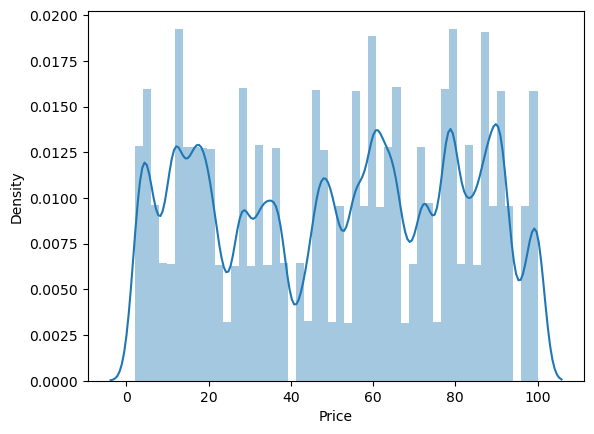

In [16]:
#Univariant Analysis

#histogram
sb.distplot(df_train['Price']);

In [12]:
#skewness and kurtosis
print("skewness: %f" % df_train['Price'].skew())
print("kurtosis: %f" % df_train['Price'].kurt())

skewness: -0.074690
kurtosis: -1.266705


In [14]:
#standardizing data
Price_Scaled = StandardScaler().fit_transform(df_train['Price'][:,np.newaxis]);
low_range = Price_Scaled[Price_Scaled[:,0].argsort()][:10]
high_range = Price_Scaled[Price_Scaled[:,0].argsort()][:-10]
print('outer range (low) of the distribution:')
print(low_range)
print('outer range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.67790363]
 [-1.67790363]
 [-1.67790363]
 [-1.67790363]
 [-1.67790363]
 [-1.67790363]
 [-1.67790363]
 [-1.67790363]
 [-1.67790363]
 [-1.67790363]]
outer range (high) of the distribution:
[[-1.67790363]
 [-1.67790363]
 [-1.67790363]
 ...
 [ 1.65084346]
 [ 1.65084346]
 [ 1.65084346]]


C:\Users\user\AppData\Local\Temp\ipykernel_17332\4253791119.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Price_Scaled = StandardScaler().fit_transform(df_train['Price'][:,np.newaxis]);


<AxesSubplot:xlabel='Product_Code', ylabel='Price'>

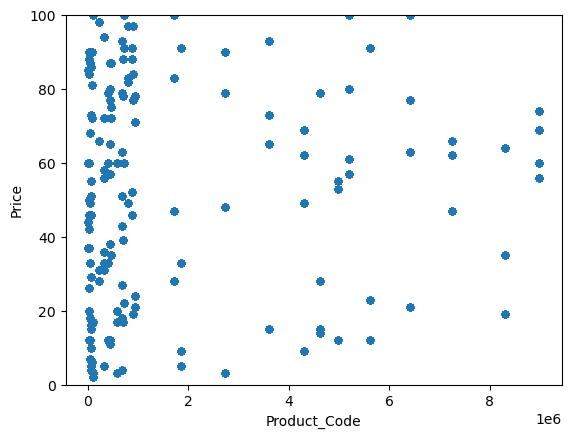

In [36]:
#BiVariant Analysis
var = 'Product_Code'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
data.plot.scatter(x=var , y='Price',ylim=(0,100))

(-0.5, 3.5, 0.0, 100.0)

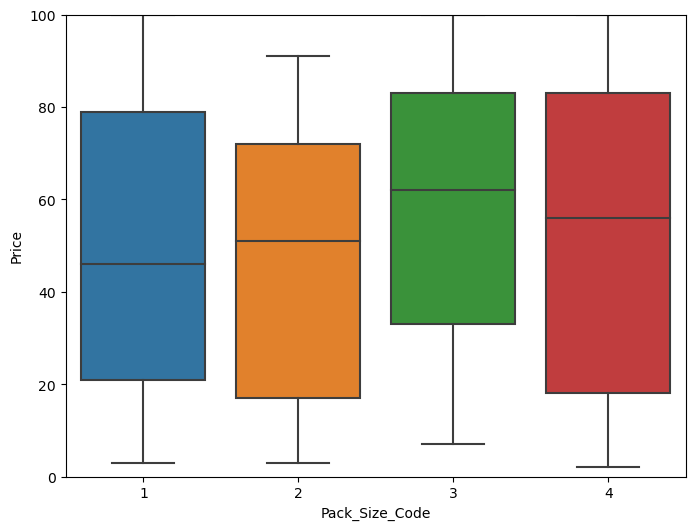

In [44]:
#boxplot sales price
var = 'Pack_Size_Code'
data = pd.concat([df_train['Price'],df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sb.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=100)

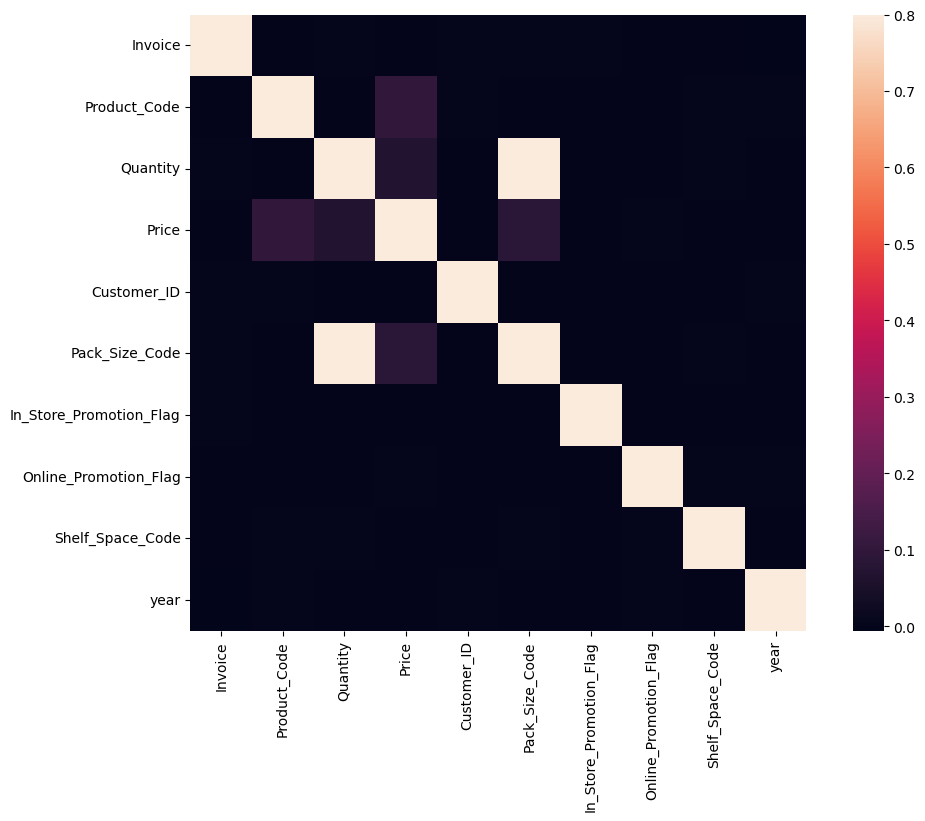

In [47]:
#Multivarinat Analysis
#Correlation matrix

Corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,8))
sb.heatmap(Corrmat, vmax=.8, square = True);

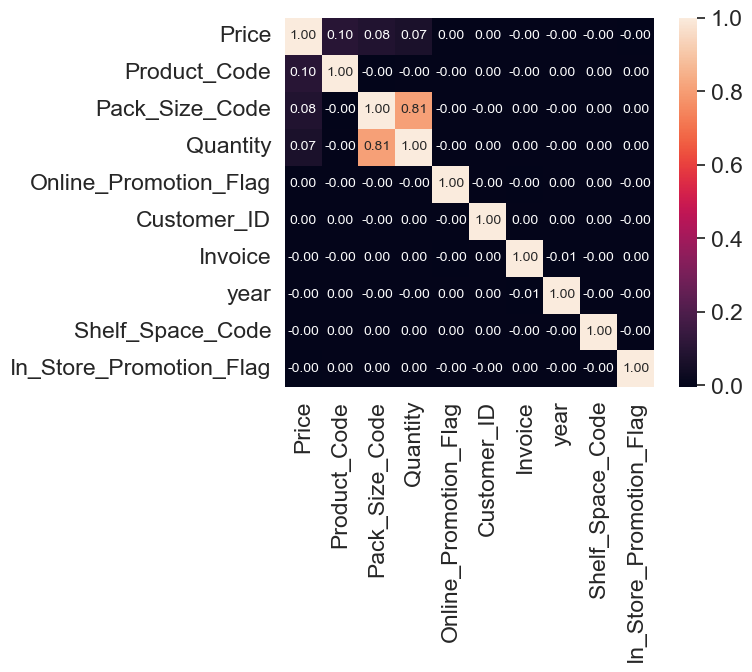

In [48]:
#Price correlation matrix
k = 10 #number of variable for heatmap
cols = Corrmat.nlargest(k,'Price')['Price'].index
cm = np.corrcoef(df_train[cols].values.T)
sb.set(font_scale=1.5)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

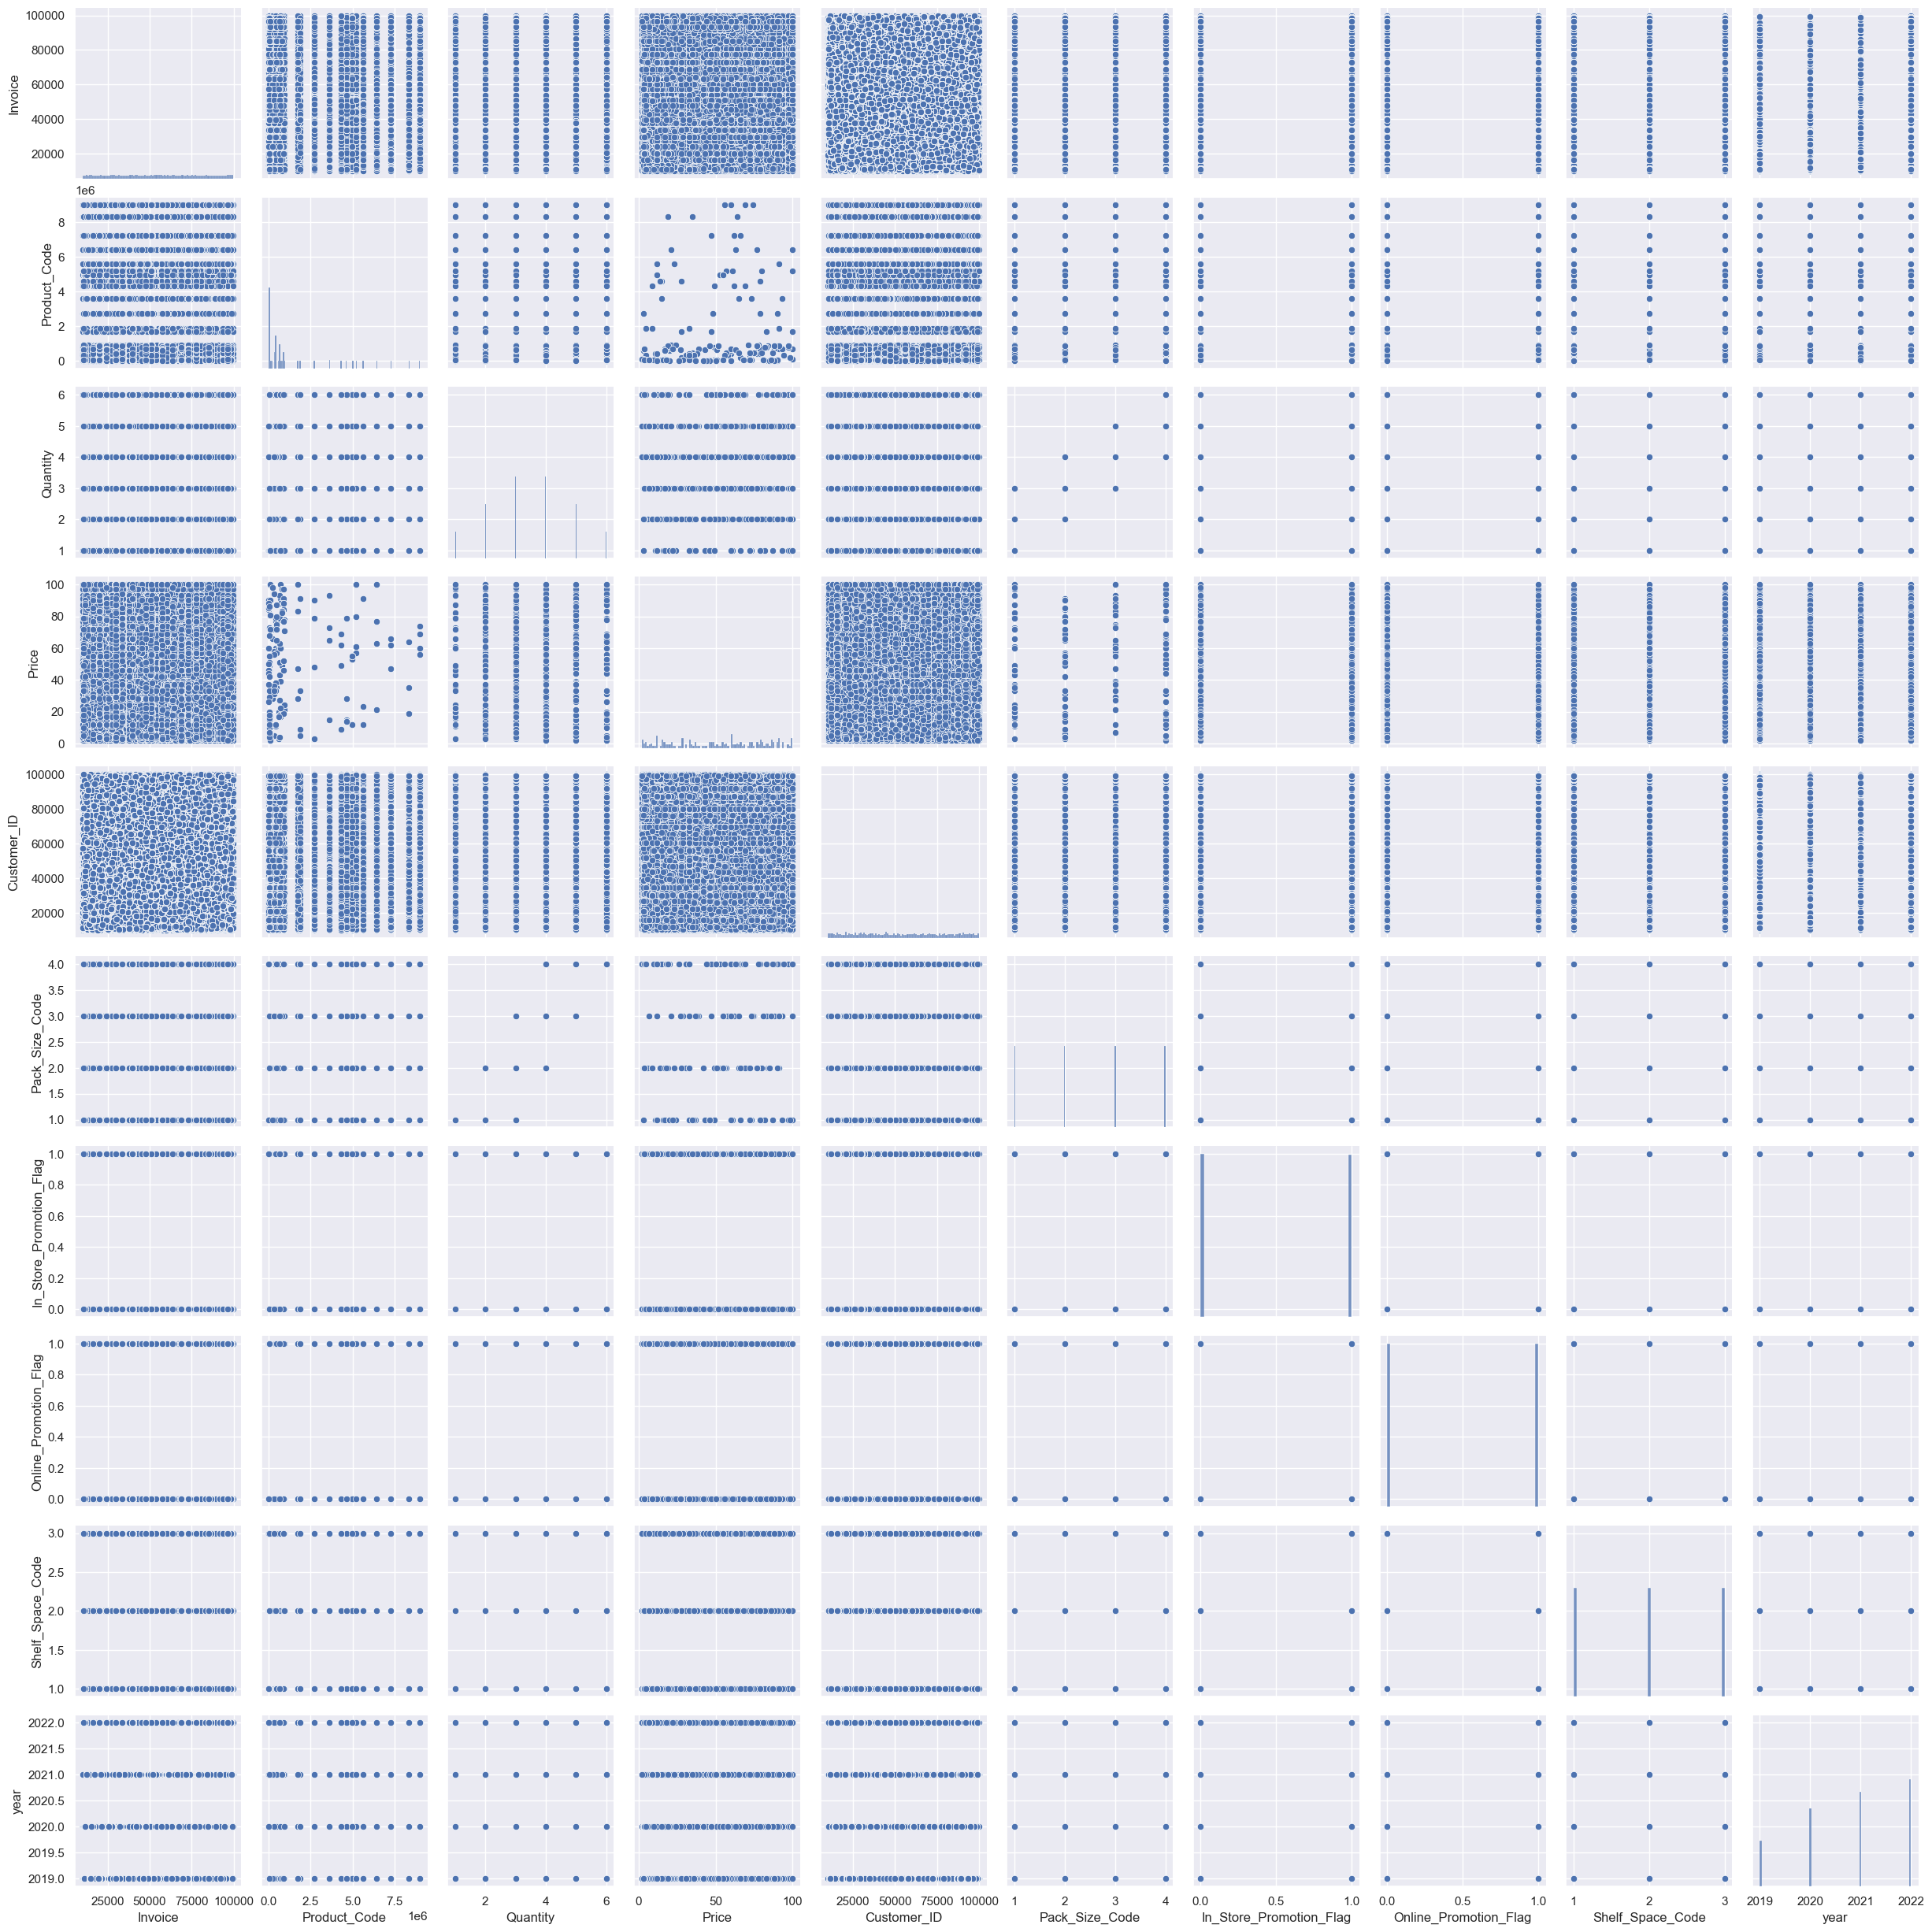

In [51]:
#scatter Plot
sb.set()
cols = ['Invoice','Product_Code','Quantity','InvoiceDate','InvoiceDate_timeStamp','Price','Customer_ID','Country','Pack_Size_Code','In_Store_Promotion_Flag','Online_Promotion_Flag','Shelf_Space_Code','year']
sb.pairplot(df_train[cols],height = 2.5)
plt.show()